# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [196]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [197]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [198]:
project_data.shape

(109248, 17)

In [199]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
project_data.project_is_approved.value_counts()

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


1    92706
0    16542
Name: project_is_approved, dtype: int64

In [200]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [201]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_subject_subcategories`

In [202]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [203]:
sorted_sub_cat_dict

{'Economics': 269,
 'CommunityService': 441,
 'FinancialLiteracy': 568,
 'ParentInvolvement': 677,
 'Extracurricular': 810,
 'Civics_Government': 815,
 'ForeignLanguages': 890,
 'NutritionEducation': 1355,
 'Warmth': 1388,
 'Care_Hunger': 1388,
 'SocialSciences': 1920,
 'PerformingArts': 1961,
 'CharacterEducation': 2065,
 'TeamSports': 2192,
 'Other': 2372,
 'College_CareerPrep': 2568,
 'Music': 3145,
 'History_Geography': 3171,
 'Health_LifeScience': 4235,
 'EarlyDevelopment': 4254,
 'ESL': 4367,
 'Gym_Fitness': 4509,
 'EnvironmentalScience': 5591,
 'VisualArts': 6278,
 'Health_Wellness': 10234,
 'AppliedSciences': 10816,
 'SpecialNeeds': 13642,
 'Literature_Writing': 22179,
 'Mathematics': 28074,
 'Literacy': 33700}

# 1.4 preprocessing of project grade categories

In [204]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [205]:
preprocessed_project_grade_categories= []
for grade_cat in tqdm(project_data["project_grade_category"]): 
    grade_cat = grade_cat.replace('-', '_')  #Replacing(-) with(_)
    grade_cat = grade_cat.replace('Grades', '') #Removing grades as it is redundant
    grad_cat = ' '.join(f for f in grade_cat.split())
    preprocessed_project_grade_categories.append(grad_cat.strip())

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 702043.11it/s]


In [206]:
print(preprocessed_project_grade_categories[12])
print("="*50)
print(preprocessed_project_grade_categories[502])
print("="*50)
print(preprocessed_project_grade_categories[5002])
print("="*50)
print(preprocessed_project_grade_categories[50002])
print("="*50)
print(preprocessed_project_grade_categories[100013])
print("="*50)

6_8
6_8
6_8
3_5
PreK_2


# 1.5 preprocessing of teacher prefix

In [207]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

<h2>Replacing Nan Values with maximum frequencies values i.e Mrs.</h2>

In [208]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna('Mrs.')

In [209]:
def replace_cate(lst):          # Removing (.) in Mrs. 
    return lst.replace('.','')
project_data['teacher_prefix']= project_data['teacher_prefix'].astype(str).apply(replace_cate)

In [210]:
preprocessed_teacher_prefix = []
for teach_prefix in tqdm(project_data["teacher_prefix"]):
    preprocessed_teacher_prefix.append(teach_prefix.strip())

100%|█████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 2235597.90it/s]


In [211]:
print(preprocessed_teacher_prefix[1])
print("="*50)
print(preprocessed_teacher_prefix[50])
print("="*50)
project_data.teacher_prefix.value_counts()

Mr
Mrs


Mrs        57272
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

 # 1.6 Adding a new feature Number of words in title(optional)

In [212]:
title_word_count = []

In [213]:
for a in project_data["project_title"] :
    b = len(a.split())
    title_word_count.append(b)

In [214]:
project_data["title_word_count"] = title_word_count

In [215]:
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            Mrs   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec            Mrs   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

   title_word_count  
0                 7  
1                 5  
2                 7  
3                 2  
4                 3

# combining 4 essays into 1 essay

In [216]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

# Adding a new feature Number of words in essay

In [217]:
essay_word_count=[]

In [218]:
for ess in project_data["essay"] :
    c = len(ess.split())
    essay_word_count.append(c)

In [219]:
project_data["essay_word_count"] = essay_word_count

In [220]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

   title_word_count                                              essay  \
0                 7  My students are English learners that are work...   
1                 5  Our students arrive to our school eager to lea...   

   essay_word_count  
0               272  
1               221

In [221]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

   title_word_count                                              essay  \
0                 7  My students are English learners that are work...   
1                 5  Our students arrive to our school eager to lea...   

   essay_word_count  
0               272  
1               221

# Train Test split

In [222]:
# train test split using sklearn.model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'],random_state=25022001)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train,random_state=25022001)

In [223]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            Mrs   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec            Mrs   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

   title_word_count                                              essay  \
0                 7  My students are English learners that are work...   
1                 5  Our students arrive to our school eager to lea...   
2                 7  \r\n\"True champions aren't always the ones th...   
3                 2  I work at a unique school filled with both ESL...   
4                 3  Our second grade classroom next year will be m...   

   essay_word_count  
0               272  
1               221  
2               361  
3               213  
4               234

In [224]:
X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)

In [225]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
21389       75072  p146651  c50bfe62d50fdb9dc30d5bfa107e4c5a             Ms   
34546       74550  p090750  ae699781d1e0eb2fd89d02008ec23b05            Mrs   

      school_state project_submitted_datetime project_grade_category  \
21389           PA        2016-12-21 09:28:52             Grades 6-8   
34546           IA        2016-07-20 14:22:51             Grades 3-5   

                  project_title  \
21389      Ink to Help Us Think   
34546  A Classroom of Wonderers   

                                         project_essay_1  \
21389  As a teacher in a low-income/high poverty scho...   
34546  Hi! My name is Shelby Jamison and I teach 5th ...   

                                         project_essay_2 project_essay_3  \
21389  Being able to display their hard work gives my...             NaN   
34546  Last year, I began a unit study of the book Wo...             NaN   

      project_essay_4                           project_resource_summary  \
21389             NaN  My students need copy paper and ink cartridges...   
34546             NaN  My students need the book Wonder to learn abou...   

       teacher_number_of_previously_posted_projects         clean_categories  \
21389                                            12  Math_Science Music_Arts   
34546                                             1        Literacy_Language   

          clean_subcategories  title_word_count  \
21389  Mathematics VisualArts                 5   
34546                Literacy                 4   

                                                   essay  essay_word_count  
21389  As a teacher in a low-income/high poverty scho...               282  
34546  Hi! My name is Shelby Jamison and I teach 5th ...               328

# 1.8 Text preprocessing

In [226]:
# printing some random reviews

print(X_train['essay'].values[0])
print("="*50)
print(X_train['essay'].values[500])
print("="*50)


As a teacher in a low-income/high poverty school, my students are faced with several challenges both inside and outside the classroom. Despite the many challenges they face, I want to provide an environment that is safe, fun and engaging so they can get the most out of their day in my room.\r\n\r\nMy students are creative, clever, and very unique. They like to move, to help and love lots of positive attention. Many of them are being raised in single-parent households and receive a free lunch based on their socioeconomic status. These things may prevent them from getting ahead early in life and may not provide them with the life experiences many of us see as \"typical\". From the minute they walk in the door of my classroom, I focus on their potential and growth while they are with me. I may not be able to control their home lives but I can certainly control their experience during the school day. By doing this in a creative and positive way, I am hopeful to inspire my students to conti

In [227]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [228]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

My students are fun, hard-working and excited about learning. It is not fun every minute of every day but we do a pretty good job of making learning fun. They enter the room with the confidence and enthusiasm for learning. They travel the world through books and make real world connections through talk and interactions. We always talk about the importance of our education so they always strive to do their very best. Their bright faces are my motivation to work harder.Before the historic flooding in the city of Baton Rouge, I welcomed my students back to school with a smiling face and warm hugs. Many came to school excited but with minimal supplies. We were in school two days before the flood. Our school is neighborhood, which many of our students live, took in water. A lot of students lost everything including school supplies they had not brought to school. The project will furnish my students with the supplies they need and take the added stress off of the parents who are already deal

In [229]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are fun, hard-working and excited about learning. It is not fun every minute of every day but we do a pretty good job of making learning fun. They enter the room with the confidence and enthusiasm for learning. They travel the world through books and make real world connections through talk and interactions. We always talk about the importance of our education so they always strive to do their very best. Their bright faces are my motivation to work harder.Before the historic flooding in the city of Baton Rouge, I welcomed my students back to school with a smiling face and warm hugs. Many came to school excited but with minimal supplies. We were in school two days before the flood. Our school is neighborhood, which many of our students live, took in water. A lot of students lost everything including school supplies they had not brought to school. The project will furnish my students with the supplies they need and take the added stress off of the parents who are already deal

In [230]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are fun hard working and excited about learning It is not fun every minute of every day but we do a pretty good job of making learning fun They enter the room with the confidence and enthusiasm for learning They travel the world through books and make real world connections through talk and interactions We always talk about the importance of our education so they always strive to do their very best Their bright faces are my motivation to work harder Before the historic flooding in the city of Baton Rouge I welcomed my students back to school with a smiling face and warm hugs Many came to school excited but with minimal supplies We were in school two days before the flood Our school is neighborhood which many of our students live took in water A lot of students lost everything including school supplies they had not brought to school The project will furnish my students with the supplies they need and take the added stress off of the parents who are already dealing with a lot

In [231]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

 # 1.8.1 Preprocessesd training data - Text

In [232]:
from tqdm import tqdm
def preprocess_textual(row_value):
    preprocessed_train = []
    for sentences in tqdm(row_value):
        sent = decontracted(sentences)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_train.append(sent.lower().strip())
    return preprocessed_train

In [233]:
preprocessed_essays_train=preprocess_textual(X_train['essay'].values)

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:25<00:00, 1932.75it/s]


In [234]:
preprocessed_essays_test=preprocess_textual(X_test['essay'].values)

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:20<00:00, 1791.95it/s]


In [235]:
preprocessed_essays_test

['students diverse culturally academically class work community celebrate differences cultures share ideas traditions cultures work together succeed socially emotionally academically many students english language learners work really hard achieve individual goals many students families not speak english school works hard students succeed prepare college school also works parents help children succeed life education students need noise canceling headphones help concentrate students need quiet environment help concentrate work students learn multiple environments students like noise others need quiet headphones great tool help noise level noise canceling headphones solution help students focus many students find hard concentrate especially sounds distracting times using noise cancelling headphones helps students block external noise concentrate need learn nannan',
 'students 6th 7th 8th graders attending public middle school many recent arrivals united states come classroom no english o

# 1.8.3 Preprocessed cross validation data

In [236]:
preprocessed_essays_cv=preprocess_textual(X_cv['essay'].values)

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:14<00:00, 1699.17it/s]


# 1.9 preprocessing of project title

In [237]:
# printing some randomproject titles.
print(project_data['project_title'].values[1])
print("="*50)
print(project_data['project_title'].values[1501])
print("="*50)
print(project_data['project_title'].values[10001])
print("="*50)
print(project_data['project_title'].values[20001])
print("="*50)

Wanted: Projector for Hungry Learners
Making Every Day at School Count
Becoming 'Readerly' Readers
The Beautiful Life of a Butterfly


In [238]:
title = decontracted(X_train['project_title'].values[2000])

# 1.9.1 Preprocessing of Project Title(Train)

In [239]:
preprocessed_titles_train=preprocess_textual(X_train["project_title"].values)

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 44925.38it/s]


# 1.9.2 Preprocessing of Project Title(Test)

In [240]:
preprocessed_titles_test=preprocess_textual(X_test["project_title"])

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 43200.58it/s]


In [241]:
preprocessed_titles_test[10]

'chromebooks empower students 21st century learning'

# 1.9.2 Preprocessing of Project Title(CV)

In [242]:
preprocessed_titles_cv=preprocess_textual(X_cv["project_title"])

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 46958.40it/s]


In [243]:
preprocessed_titles_cv[10]

'newbery books 5th grade'

## 1.5 Preparing data for models

In [244]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'title_word_count', 'essay',
       'essay_word_count'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [245]:
project_data.head(10)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc            Mrs   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a             Mr   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0             Ms   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60            Mrs   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec            Mrs   
5      141660  p154343  a50a390e8327a95b77b9e495b58b9a6e            Mrs   
6       21147  p099819  9b40170bfa65e399981717ee8731efc3            Mrs   
7       94142  p092424  5bfd3d12fae3d2fe88684bbac570c9d2             Ms   
8      112489  p045029  487448f5226005d08d36bdd75f095b31            Mrs   
9      158561  p001713  140eeac1885c820ad5592a409a3a8994             Ms   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   
5           FL        2017-04-08 22:40:43             Grades 3-5   
6           CT        2017-02-17 19:58:56             Grades 6-8   
7           GA        2016-09-01 00:02:15             Grades 3-5   
8           SC        2016-09-25 17:00:26          Grades PreK-2   
9           NC        2016-11-17 18:18:56          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   
5  Flexible Seating for Mrs. Jarvis' Terrific Thi...   
6  Chromebooks for Special Education Reading Program   
7                              It's the 21st Century   
8                    Targeting More Success in Class   
9    Just For the Love of Reading--\r\nPure Pleasure   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   
4  Our second grade classroom next year will be m...   
5  I will be moving from 2nd grade to 3rd grade a...   
6  My students are a dynamic and very energetic g...   
7  Not only do our students struggle with poverty...   
8  My students are enthusiastic and inquisitive l...   
9  Over 95% of my students are on free or reduced...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   
4  For many students, math is a subject that does...             NaN   
5  These flexible seating options will allow my s...             NaN   
6  My students are an engaging and active group o...             NaN   
7  My students need 4 iPads, the latest technolog...             NaN   
8  My second graders need extra activity time dur...             NaN   
9  Reading is Fundamental! My students will read ...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   
4             NaN  My students need hands

### 1.5.1 Vectorizing Categorical data

In [246]:
print(project_data.shape)

(109248, 20)


 # one hot vector for clean categories of Projects (train,test,cv)

In [247]:
# we use count vectorizer to convert the values into one hot vectors 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_proj = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=5000)
vectorizer_proj.fit(X_train['clean_categories'].values)

categories_one_hot_train = vectorizer_proj.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer_proj.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer_proj.transform(X_cv['clean_categories'].values)

print(vectorizer_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",categories_one_hot_test.shape)
print("Shape of matrix of CV data after one hot encoding ",categories_one_hot_cv.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix of Train data after one hot encoding  (49041, 9)
Shape of matrix of Test data after one hot encoding  (36052, 9)
Shape of matrix of CV data after one hot encoding  (24155, 9)


# one hot vector for clean subcategories (train ,test,cv)

In [248]:
# we use count vectorizer to convert the values into one 

vectorizer_sub_proj = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=5000)
vectorizer_sub_proj.fit(X_train['clean_subcategories'].values)

sub_categories_one_hot_train = vectorizer_sub_proj.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer_sub_proj.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer_sub_proj.transform(X_cv['clean_subcategories'].values)


print(vectorizer_sub_proj.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",sub_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",sub_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",sub_categories_one_hot_cv.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix of Train data after one hot encoding  (49041, 30)
Shape of matrix of Test data after one hot encoding  (36052, 30)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 30)


In [249]:
sub_categories_one_hot_cv[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

# One hot vector for school states(train,test,cv)

In [250]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [251]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [252]:
## Using count vectorizer to convert the values into one hot encoded features

vectorizer_states = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=5000)
vectorizer_states.fit(X_train['school_state'].values)

school_state_categories_one_hot_train = vectorizer_states.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer_states.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer_states.transform(X_cv['school_state'].values)

print(vectorizer_states.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix of Train data after one hot encoding  (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 51)


# one hot vector for Project grade category (train,test,cv)

In [253]:
my_counter = Counter()
for project_grade in preprocessed_project_grade_categories:
    my_counter.update(project_grade.split())

In [254]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [255]:
## we use count vectorizer to convert the values into one hot encoded features
vectorizer_grade = CountVectorizer(min_df=10,ngram_range=(1,1), max_features=5000)
vectorizer_grade.fit(X_train['project_grade_category'].values)

project_grade_categories_one_hot_train = vectorizer_grade.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer_grade.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer_grade.transform(X_cv['project_grade_category'].values)

print(vectorizer_grade.get_feature_names())

print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

['12', 'grades', 'prek']
Shape of matrix of Train data after one hot encoding  (49041, 3)
Shape of matrix of Test data after one hot encoding  (36052, 3)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 3)


# One hot vector for teacher prefix(train,test,cv)

In [256]:
vectorizer_teacher = CountVectorizer()
vectorizer_teacher.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
teacher_prefix_categories_one_hot_train = vectorizer_teacher.transform(X_train['teacher_prefix'].values)
teacher_prefix_categories_one_hot_cv = vectorizer_teacher.transform(X_cv['teacher_prefix'].values)
teacher_prefix_categories_one_hot_test = vectorizer_teacher.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print("Shape of matrix of Train data after one hot encoding",teacher_prefix_categories_one_hot_train.shape, y_train.shape)
print("Shape of matrix of cv data after one hot encoding",teacher_prefix_categories_one_hot_cv.shape, y_cv.shape)
print("Shape of matrix of Test data after one hot encoding",teacher_prefix_categories_one_hot_test.shape, y_test.shape)
print(vectorizer_teacher.get_feature_names())
print("="*100)

After vectorizations
Shape of matrix of Train data after one hot encoding (49041, 5) (49041,)
Shape of matrix of cv data after one hot encoding (24155, 5) (24155,)
Shape of matrix of Test data after one hot encoding (36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


# 1.11 Vectorizing text data

## A) Bag of words

###  BOW train data essays

In [257]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_essay = CountVectorizer(min_df=10,max_features=5000)  #selecting top 5000 features
vectorizer_bow_essay.fit(preprocessed_essays_train)

text_bow_train = vectorizer_bow_essay.transform(preprocessed_essays_train)

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 5000)


### BOW (test essays)

In [258]:
text_bow_test = vectorizer_bow_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 5000)


### Bow (cv essays)

In [259]:
text_bow_cv = vectorizer_bow_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 5000)


### Bow(train titles)

In [260]:
vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(preprocessed_titles_train)
title_bow_train = vectorizer_bow_title.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (49041, 1990)


### Bow(test titles)

In [261]:
title_bow_test = vectorizer_bow_title.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (36052, 1990)


### Bow(cv titles)

In [262]:
title_bow_cv = vectorizer_bow_title.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (24155, 1990)


## B) Tfidf

### tfidf(train essays)

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf_essay = TfidfVectorizer(min_df=10,max_features=5000) #Considering top 5000 features
vectorizer_tfidf_essay.fit(preprocessed_essays_train)

text_tfidf_train = vectorizer_tfidf_essay.transform(preprocessed_essays_train)
print("Shape of matrix after one hot encoding ",text_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 5000)


### tfidf(test essays)

In [264]:
text_tfidf_test = vectorizer_tfidf_essay.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encoding ",text_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 5000)


### tfidf(cv essays)

In [265]:
text_tfidf_cv = vectorizer_tfidf_essay.transform(preprocessed_essays_cv)
print("Shape of matrix after one hot encoding ",text_tfidf_cv.shape)

Shape of matrix after one hot encoding  (24155, 5000)


### tfidf(train titles)

In [266]:
vectorizer_tfidf_titles = TfidfVectorizer(min_df=10)

vectorizer_tfidf_titles.fit(preprocessed_titles_train)
title_tfidf_train = vectorizer_tfidf_titles.transform(preprocessed_titles_train)
print("Shape of matrix after one hot encoding ",title_tfidf_train.shape)

Shape of matrix after one hot encoding  (49041, 1990)


### tfidf(test titles)

In [267]:
title_tfidf_test = vectorizer_tfidf_titles.transform(preprocessed_titles_test)
print("Shape of matrix after one hot encoding ",title_tfidf_test.shape)

Shape of matrix after one hot encoding  (36052, 1990)


### tfidf(cv titles)

In [268]:
title_tfidf_cv = vectorizer_tfidf_titles.transform(preprocessed_titles_cv)
print("Shape of matrix after one hot encoding ",title_tfidf_cv.shape)


Shape of matrix after one hot encoding  (24155, 1990)


## 1.5.2.3 Using Pretrained Models: Avg W2V

In [269]:

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

# train essays

In [270]:
def avg_word_vec(preprocessed_data):
    avg_w2v_vectors = [];
    for sentence in tqdm(preprocessed_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return avg_w2v_vectors

In [271]:
avg_w2v_vectors_train =avg_word_vec(preprocessed_essays_train)
print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:11<00:00, 4251.97it/s]

49041
300


# test essays

In [272]:
avg_w2v_vectors_test =avg_word_vec(preprocessed_essays_test)
print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:08<00:00, 4220.36it/s]


36052
300


# cv essays

In [273]:
avg_w2v_vectors_cv =avg_word_vec(preprocessed_essays_cv)
print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:06<00:00, 3758.37it/s]

24155
300


# train titles

In [274]:
avg_w2v_vectors_titles_train =avg_word_vec(preprocessed_titles_train)
print(len(avg_w2v_vectors_titles_train))
print(len(avg_w2v_vectors_titles_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 79370.90it/s]

49041
300


# test titles

In [275]:
avg_w2v_vectors_titles_test =avg_word_vec(preprocessed_titles_test)
print(len(avg_w2v_vectors_titles_test))
print(len(avg_w2v_vectors_titles_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 46763.63it/s]

36052
300


# Cv titles

In [276]:
avg_w2v_vectors_titles_cv =avg_word_vec(preprocessed_titles_cv)
print(len(avg_w2v_vectors_titles_cv))
print(len(avg_w2v_vectors_titles_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 98446.65it/s]

24155
300


# using pretrained models : Tfidf weighted W2V

## train essays

In [277]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [278]:
def tfidfWV(preprocessed_data):
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    print("The length of TFIDF word to vec is ", len(tfidf_w2v_vectors))
    print("The length of TFIDF word to vec of index 0 is ",len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

In [279]:
tfidf_w2v_vectors_train=tfidfWV(preprocessed_essays_train)

100%|███████████████████████████████████████████████████████████████████████████| 49041/49041 [01:24<00:00, 577.39it/s]


The length of TFIDF word to vec is  49041
The length of TFIDF word to vec of index 0 is  300


## Test essays

In [280]:
tfidf_w2v_vectors_test=tfidfWV(preprocessed_essays_test)

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:00<00:00, 599.19it/s]


The length of TFIDF word to vec is  36052
The length of TFIDF word to vec of index 0 is  300


## cv essays

In [281]:
tfidf_w2v_vectors_cv = tfidfWV(preprocessed_essays_cv)

100%|███████████████████████████████████████████████████████████████████████████| 24155/24155 [00:40<00:00, 600.07it/s]


The length of TFIDF word to vec is  24155
The length of TFIDF word to vec of index 0 is  300


## train titles

In [282]:

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [283]:
tfidf_w2v_vectors_titles_train = tfidfWV(preprocessed_titles_train)

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 41268.04it/s]

The length of TFIDF word to vec is  49041
The length of TFIDF word to vec of index 0 is  300


## test titles

In [284]:
tfidf_w2v_vectors_titles_test = tfidfWV(preprocessed_titles_test)

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:01<00:00, 30763.99it/s]

The length of TFIDF word to vec is  36052
The length of TFIDF word to vec of index 0 is  300


## cv titles

In [285]:
tfidf_w2v_vectors_titles_cv = tfidfWV(preprocessed_titles_cv)

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 41902.45it/s]

The length of TFIDF word to vec is  24155
The length of TFIDF word to vec of index 0 is  300


# 1.12  Vectorizing Numerical features

Various numerical feautures are :

1.Price

2.Quantity

3.Number of Projects previously proposed by Teacher

4.Title word Count ( introduced by us)

5.Essay word Count ( introduced by us)

## 1) Price

In [286]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(4)

id    price  quantity
0  p000001   459.56         7
1  p000002   515.89        21
2  p000003   298.97         4
3  p000004  1113.69        98

In [287]:
# join two dataframes in python: 
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_data, on='id', how='left')


In [288]:
X_train

Unnamed: 0       id                        teacher_id teacher_prefix  \
0           75072  p146651  c50bfe62d50fdb9dc30d5bfa107e4c5a             Ms   
1           74550  p090750  ae699781d1e0eb2fd89d02008ec23b05            Mrs   
2           41287  p008571  c54214aa05738ed50dc5b5c5d8d0fac2            Mrs   
3           33681  p237109  8db248da6d69bceb1a82a81f46d58fa9            Mrs   
4           16086  p075327  4a0d588f7e0cdc5825efe82f359e7f95            Mrs   
5          140444  p109747  afe056ad0079c51559c16e41ba896e40             Ms   
6          149732  p020680  50d1262c4573d97fb663bbcce3d7606b        Teacher   
7          120446  p097833  5de1f28f96029ab925970918c05bd21a             Ms   
8           75418  p006449  0eb923e0f215e40f76486d83cf001c21             Mr   
9          134746  p100530  e9ed6c51d2f7689daf750ce72d1e4a43            Mrs   
10          22188  p156012  c0836f55515bc75935dbaed1ba7e3150            Mrs   
11           1063  p125936  1503d129f8d362b7e5812bad6933fdd6             Ms   
12         151331  p037220  f3f71d03355daca874084550ef7e81c0            Mrs   
13         100360  p140417  1fcbf2bc4246ac3970430a581e9ffffc            Mrs   
14         124539  p239905  8815187fd0a65e6c6db0004af7a21ff6             Ms   
15         164944  p029483  7f9cd7adf81512b9aa3e30b67ee85b1e             Ms   
16         124425  p230640  bcaed485a04e62d1a9a5176a485131b9            Mrs   
17         156609  p147244  bf81d32f6d974533e7ea10f0d4d75fb7            Mrs   
18           1759  p030498  848ba5078a9852ecc9380d3faf29adc5             Mr   
19          12362  p174974  aeccaa40d29bc1c959367f0f8b23df24            Mrs   
20         128523  p199970  3dde71a8d3237b365a02e47e0066ad72             Ms   
21          77172  p068092  2248c18c50f54331392bf22be1a80636            Mrs   
22         110759  p228721  90b4bf2cb56734db3fbf8265e730ecd7            Mrs   
23         145576  p067548  8610112e442096fe6912adc7341a8d27            Mrs   
24         141746  p237930  93be891398453d204164fcc5bd8f3c50             Ms   
25          60642  p027676  efedc01b4d6e89c0caf6d592f4e881e6            Mrs   
26         129256  p181851  9b3d5f77c8d701f77bb0b8a955bb4149             Ms   
27          17338  p028308  7fbe884898c27665e660163872906814            Mrs   
28          28301  p240959  033ca9b91a16f32ac59b10a0c833c4dc            Mrs   
29          23656  p229842  fbd677d47c336665edc07b47accdad30            Mrs   
...           ...      ...                               ...            ...   
49011       95428  p249926  3c91426b84d5d38095b675fce5a6aba5             Ms   
49012      173743  p015593  e6a2f6e7575c03b5fd7b5d8f879e535f             Ms   
49013       33296  p231779  b357af898fe06944813be328a2e1335a             Mr   
49014       61291  p186329  51fe764ec6adda87595a7e1a9ffa7cd6             Ms   
49015      179196  p011218  57c21f652316e79b021e5f074db3f545            Mrs   
49016      147746  p214033  40fe79f6c56113ec675f98c0bb150eb5             Ms   
49017       54199  p073481  3b4706a355ab94f189ea3790faa37b66            Mrs   
49018        7322  p238068  d1fe66a662ad4807b33f87d2a12fac8b             Mr   
49019       54699  p053809  de92a69f7166795d907d9ea302a403de             Ms   
49020      124447  p039094  da13d88dc3bdd568f5745688060f9c39            Mrs   
49021      139136  p122580  528b043a0270e9a99d148c2504384d4a            Mrs   
49022       22414  p088204  3bf5c7f5ddac059c3f2c18836250adf2            Mrs   
49023       32973  p245804  c6911aa7772191e790daf88c82535765            Mrs   
49024      133480  p043642  90cd0864d79be0da27ac4ba5a063eacf             Ms   
49025      119034  p107081  88d8ee6a5128246533469fee1d836b9f            Mrs   
49026       62419  p110668  d61089315dab986edfe3ad78b45e3f82            Mrs   
49027       82580  p030031  9ea5f3fda33a3bc62da709bdfb80dba3            Mrs   
49028      118982  p061114  6b6173694123b381919fc2ad34db4974            Mrs   
49029      121682  p057991  50a02c40f19e7d5eb0227aceda0fc

In [289]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_train = normalizer.transform(X_train['price'].values.reshape(1,-1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(1,-1))
price_test = normalizer.transform(X_test['price'].values.reshape(1,-1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


## 2) Quantity

In [290]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(1,-1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(1,-1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(1,-1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


## 3)  Number of Projects previously proposed by Teacher

In [291]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## 4) title word count

In [292]:
normalizer = Normalizer()

normalizer.fit(X_train['title_word_count'].values.reshape(1,-1))

title_word_count_train = normalizer.transform(X_train['title_word_count'].values.reshape(1,-1))
title_word_count_cv = normalizer.transform(X_cv['title_word_count'].values.reshape(1,-1))
title_word_count_test = normalizer.transform(X_test['title_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print("="*100)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


## 5) essay word count


In [293]:
normalizer = Normalizer()

normalizer.fit(X_train['essay_word_count'].values.reshape(1,-1))

essay_word_count_train = normalizer.transform(X_train['essay_word_count'].values.reshape(1,-1))
essay_word_count_cv = normalizer.transform(X_cv['essay_word_count'].values.reshape(1,-1))
essay_word_count_test = normalizer.transform(X_test['essay_word_count'].values.reshape(1,-1))

print("After vectorizations")
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)

After vectorizations
(1, 49041) (49041,)
(1, 24155) (24155,)
(1, 36052) (36052,)


# Assignment 4

1. Apply Multinomial NaiveBayes on these feature sets
    - : categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)
    - : categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)
    

2. The hyper paramter tuning(find best Alpha)
    - : Find the best hyper parameter which will give the maximum AUC value
    - : Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001
    - : Find the best hyper paramter using k-fold cross validation or simple cross validation data
    - : Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
    

3. Feature importance
    - : Find the top 10 features of positive class and top 10 features of negative class for both feature sets and using values of `feature_log_prob_` parameter of MultinomialNB and print their corresponding feature names
    

4. Representation of results
    - : You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.

    - : Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test. 
    - : Along with plotting ROC curve, you need to print the confusion matrix with predicted and original labels of test data points. Please visualize your confusion matrices using seaborn heatmaps.
    

5. Conclusion
    - : You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library link

# 2. Naive Bayes

## Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW

In [294]:
# reshaping to appt shape so that it can be used with hstack

In [295]:
price_train = (X_train['price'].values.reshape(-1,1))
price_cv = (X_cv['price'].values.reshape(-1,1))
price_test = (X_test['price'].values.reshape(-1,1))

quantity_train =(X_train['quantity'].values.reshape(-1,1))
quantity_cv = (X_cv['quantity'].values.reshape(-1,1))
quantity_test = (X_test['quantity'].values.reshape(-1,1))

prev_projects_train = (X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = (X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = (X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

title_word_count_train = (X_train['title_word_count'].values.reshape(-1,1))
title_word_count_cv = (X_cv['title_word_count'].values.reshape(-1,1))
title_word_count_test = (X_test['title_word_count'].values.reshape(-1,1))


essay_word_count_train = (X_train['essay_word_count'].values.reshape(-1,1))
essay_word_count_cv = (X_cv['essay_word_count'].values.reshape(-1,1))
essay_word_count_test = (X_test['essay_word_count'].values.reshape(-1,1))


In [296]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [297]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7093) (49041,)
(24155, 7093) (24155,)
(36052, 7093) (36052,)


In [298]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    return y_data_pred

# A) Random alpha values (hyperparameter)

In [299]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_tr, y_train)
    y_train_pred = batch_predict(nb, X_tr)    
    y_cv_pred = batch_predict(nb, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 9022.16it/s]


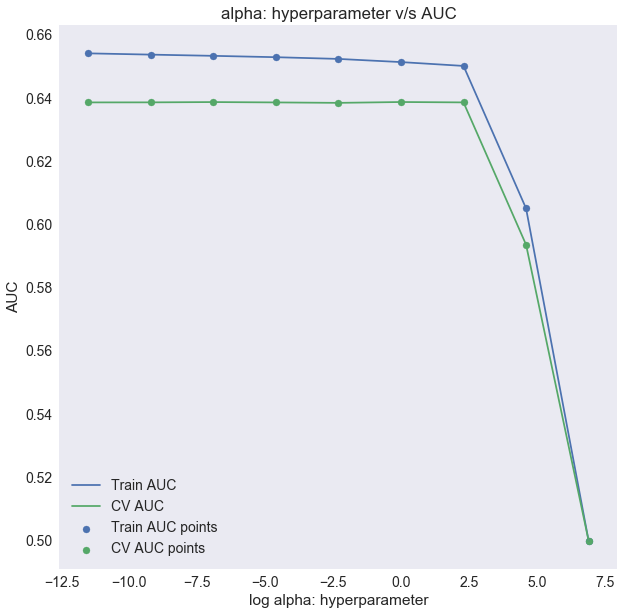

In [300]:
plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

# Summary

- As you can see in the plot, we've chosen hyperparameter alpha values as low as 0.0001 and as high as 1000. Since it's hard to plot the range provided, we've used log alphas on the x-axis and AUc on the y-axis.

- In addition to being able to display large ranges of values using log scales, log scales also prevent small values from being compressed into the graph's bottom.

- In both train and CV AUC lines, convergence can be observed at log alpha values closer to 7.

- We can see how both lines converge much more rapidly after alpha=10.


# B) Gridsearch-cv using cv = 10 ( K fold cross validation)

 - return_train_score=True needs to be explicitly set for GridSearchCV function to return train scores
 - Also verbose is set to 2 to display progress messages

In [301]:
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=-1)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   15.5s finished


100%|██████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<?, ?it/s]


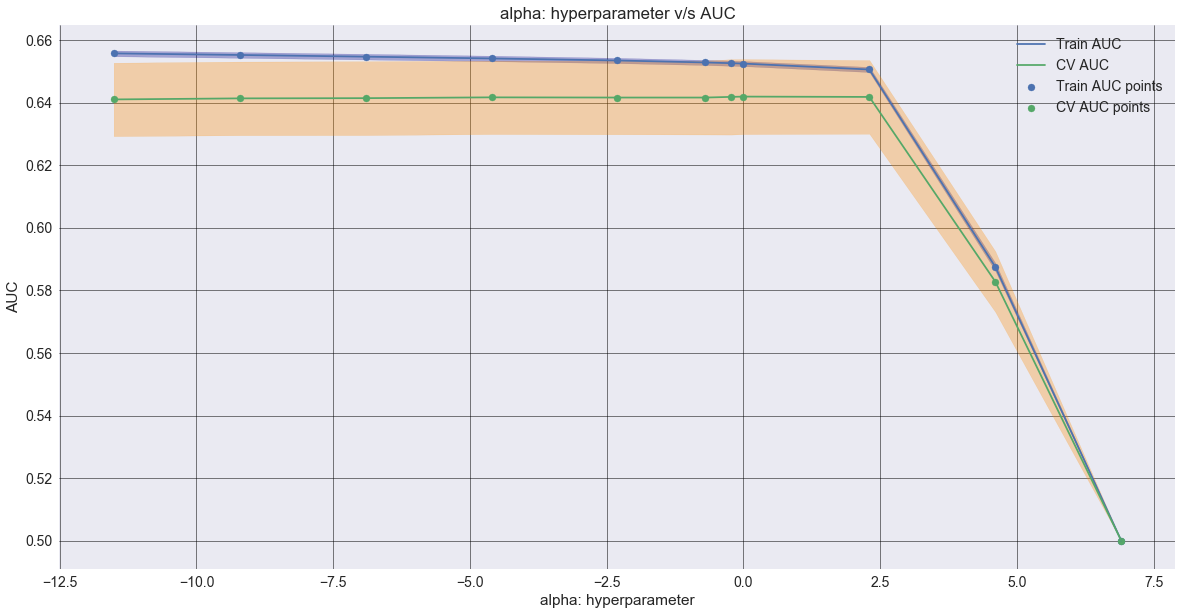

In [302]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- We have started with hyperparameter alpha with as low as 0.0001 to 1000.Since it is difficult to plot the given range we have used log alphas on x-axis and Auc on y axis as shown in the plot.

- One of the main reason for using log scale is  log scales allow a large range to be displayed without small values being compressed down into bottom of the graph.

- we observe that as log alpha approaches close to 7 ,both train AUc and cv AUC lines converge

- Using this plot we see after alpha=100 both lines converge at amuch higher rate

# Train model using the best hyper-parameter value

- Using best_params_ attribute of gridsearch cv we can obtain the optimal value of alpha among the values we have selected

- It simplifes our task and we can be rest assured that selected hyperparameter is most optimal one

In [303]:
print(clf.best_params_)

{'alpha': 1}


In [304]:
best_alpha1=clf.best_params_

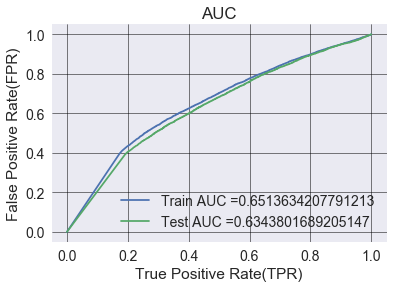

In [305]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

nb_bow = MultinomialNB(alpha = 1,class_prior=[0.5,0.5])

nb_bow.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_bow, X_tr)    
y_test_pred = batch_predict(nb_bow, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# summary

 - For Bow model for alpha= 1 ,we get train AUC of 0.65 and Test AUC of 0.63

# D) confusion matrix

In [306]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is ver+.+y low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## train data

In [307]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.38243606289412657 for threshold 0.999
[[ 4137  3289]
 [14316 27299]]


In [308]:
conf_matr_df_train_1 = pd.DataFrame(data=confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


the maximum value of tpr*(1-fpr) 0.38243606289412657 for threshold 0.999


In [309]:
conf_matr_df_train_1

0      1
0   4137   3289
1  14316  27299

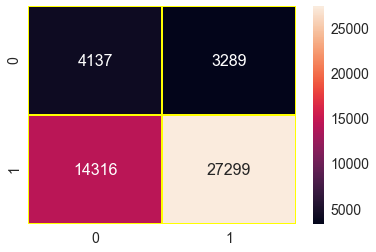

In [310]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='.0f',linewidth=1,linecolor='yellow')
#mention prediction and actual

# Summary on train data

- In the following confusion matrix we observe that the model has 27268 true positives while true negatives are only 4174
-  It has large number of false negatives which is 14347

## test data

In [311]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3629947374659989 for threshold 1.0
[[ 3497  1962]
 [13285 17308]]


In [312]:
conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

the maximum value of tpr*(1-fpr) 0.3629947374659989 for threshold 1.0


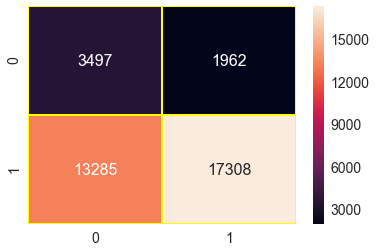

In [313]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g',linewidth=1,linecolor='yellow')

# Summary on test data

- The number of true positives dominate ,there are 19080 in number,
- The least number among 4 quantites is false positives which are 2321 false positives
- similar trend is observed for false negatives which are roughly 11513

# Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

In [314]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [315]:
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(49041, 7093) (49041,)
(24155, 7093) (24155,)
(36052, 7093) (36052,)


# A) random alpha values

In [316]:
train_auc = []
cv_auc = []
log_alphas =[]

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(X_tr, y_train)
    y_train_pred = batch_predict(nb, X_tr)    
    y_cv_pred = batch_predict(nb, X_cr)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 11019.19it/s]


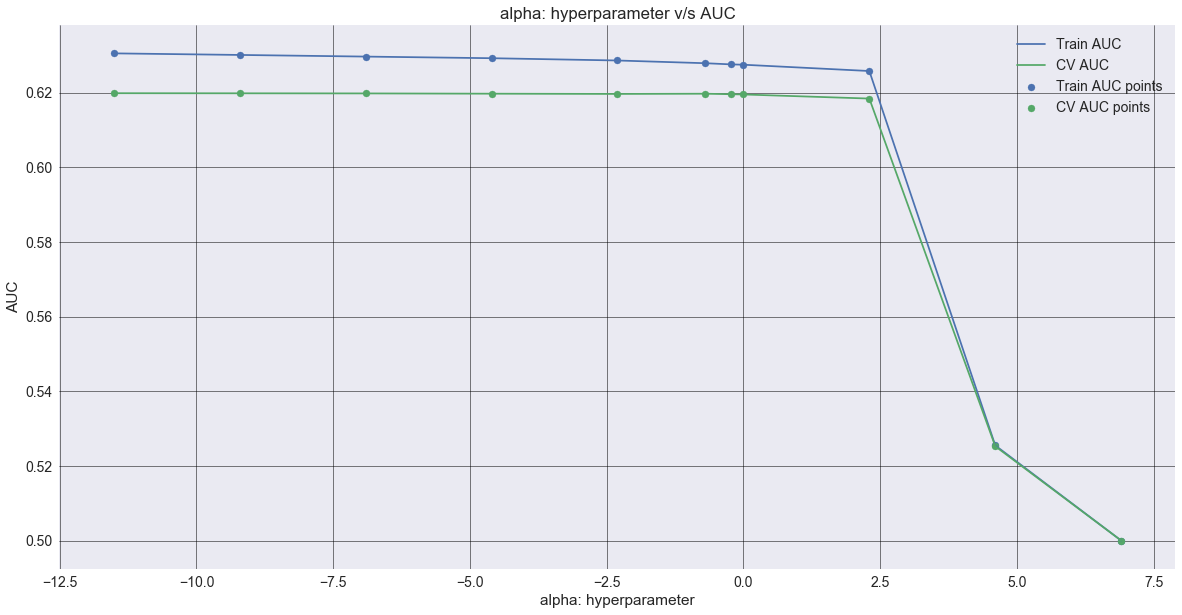

In [317]:
plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- Starting with an alpha between 0.0001 and 1000, it has been difficult to plot the given range on an x-axis. As depicted in the plot, log alphas are plotted on the x-axis and auc is plotted on the y-axis.

- In addition to allowing a large range of values to be displayed, log scales allow smaller values to be compressed into the bottom of the graph.

- The log alpha converges in both the train and cv AUC lines as log alpha approaches near 7.
- In this plot we can see that alpha=100 accelerates convergence of both lines at a much higher rate.
- The Cv Auc line remains constant for a long time in comparison to set1, only dropping after alpha=10.

In [318]:
for it1,it2,it3 in zip(log_alphas, train_auc,cv_auc):
    print(2.71828**it1,it1,it2,it3)

1.0000077442305922e-05 -11.512925464970229 0.6305130724069298 0.6198406399279754
0.0001000006195379677 -9.210340371976182 0.6300889526390047 0.6198141462169502
0.001000004646531159 -6.907755278982137 0.6296496306106348 0.6197826432468665
0.010000030976850406 -4.605170185988091 0.6292142660885494 0.6197096788196494
0.10000015488413208 -2.3025850929940455 0.6286031679012652 0.619643251108647
0.5000002331237219 -0.6931471805599453 0.6278726115939919 0.6197033355368737
0.8000001200785021 -0.2231435513142097 0.6275584040396465 0.619564997277391
1.0 0.0 0.6274713939116985 0.6195010308401471
9.999984511610785 2.302585092994046 0.6257835563122243 0.6184050503149723
99.99969023245559 4.605170185988092 0.5254896880103319 0.5252581182480224
999.9953534904313 6.907755278982137 0.5 0.5


#  B) Gridsearch-cv using cv = 10 ( K fold cross validation)

In [319]:
nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1,0.25,0.5,0.8, 1,100]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2,n_jobs=-1)

clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.1s finished


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10022.23it/s]


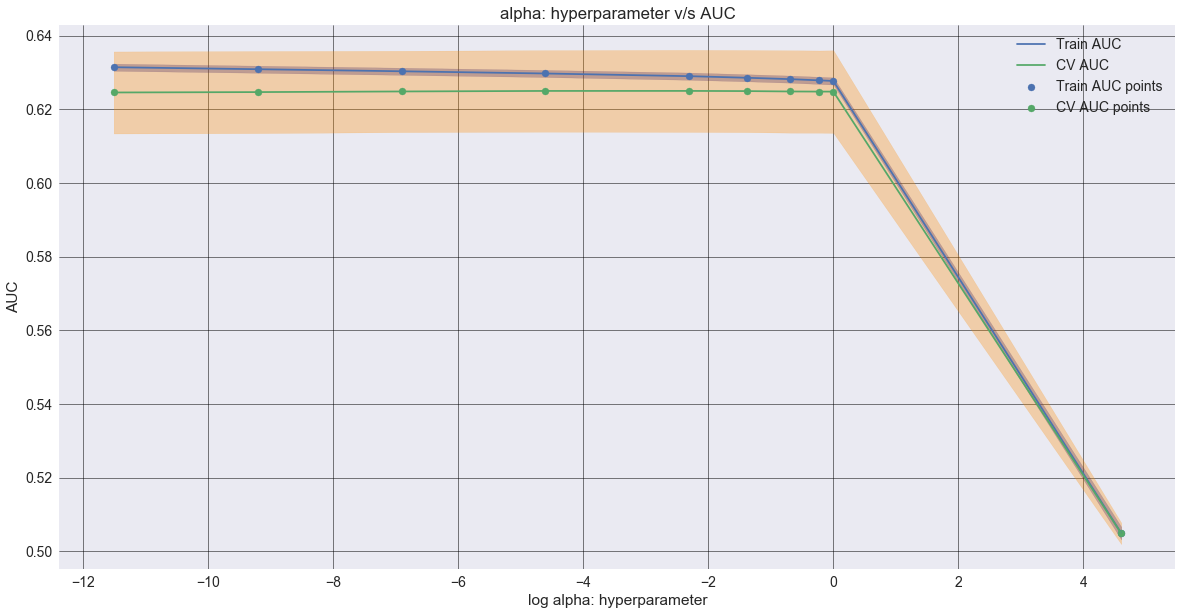

In [320]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1,0.25,0.5,0.8, 1,100]
log_alphas =[]

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

plt.figure(figsize=(20,10))

plt.plot(log_alphas, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(log_alphas, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_alphas,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [321]:
print( 2.67**0.6282283144644325)

1.8533030942243873


# Summary

In [322]:
for it1,it2,it3 in zip(log_alphas, train_auc,cv_auc):
    print(2.71828**it1,it1,it2)

1.0000077442305922e-05 -11.512925464970229 0.6314653388396043
0.0001000006195379677 -9.210340371976182 0.6309235800488118
0.001000004646531159 -6.907755278982137 0.6303640989349862
0.010000030976850406 -4.605170185988091 0.6297609865291701
0.10000015488413208 -2.3025850929940455 0.6290311619649992
0.25000023312377617 -1.3862943611198906 0.6286023244891439
0.5000002331237219 -0.6931471805599453 0.6282283144644325
0.8000001200785021 -0.2231435513142097 0.6278960124932909
1.0 0.0 0.6277296201884919
99.99969023245559 4.605170185988092 0.5049324818705895


- We have started with hyperparameter alpha with as low as 0.0001 to 1000.Since it is difficult to plot the given range we have used log alphas on x-axis and Auc on y axis as shown in the plot.

- One of the main reason for using log scale is  log scales allow a large range to be displayed without small values being compressed down into bottom of the graph.

- we observe that as log alpha approaches close to 2 ,both train AUc and cv AUC lines converge

- Using this plot we see after alpha=100 both lines converge at a much higher rate

- One thing different from set1 plot is Cv Auc line remains constant for a long time ,only after log alpha=0.1 it starts dropping 

# C) Train model using the best hyper-parameter value of alpha

In [323]:
# Code idea for best_params_ taken from here https://datascience.stackexchange.com/questions/21877/how-to-use-the-output-of-gridsearch

In [324]:
best_alpha2=clf.best_params_
print(best_alpha2)

{'alpha': 0.1}


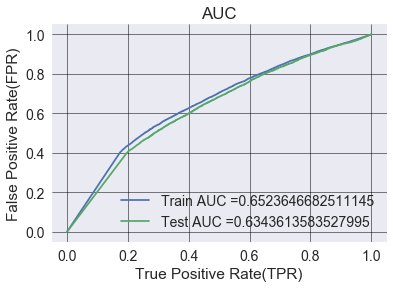

In [359]:
nb_tfidf = MultinomialNB(alpha = 0.1,class_prior=[0.5,0.5])

nb_tfidf.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_tfidf, X_tr)    
y_test_pred = batch_predict(nb_tfidf, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

# Summary

- From given plot we observe that we get train AUC of 0.652 and test AUC of 0.634

# D) Confusion matrix

## train data

In [360]:
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.3830785282826924 for threshold 0.999
[[ 4129  3297]
 [14204 27411]]


In [361]:
conf_matr_df_train_2 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.3830785282826924 for threshold 0.999


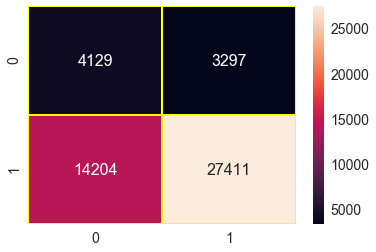

In [362]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_2, annot=True,annot_kws={"size": 16}, fmt='g',linewidth=1,linecolor='yellow')

# Summary

- For training data we get roughly 27411 true positives and 4129 true negatives and false positives each
- Again we have roughly 14204 false negatives which are alot in number

## test data

In [363]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.363407001160974 for threshold 1.0
[[ 3480  1979]
 [13193 17400]]


In [364]:
conf_matr_df_test_2 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)), range(2),range(2))

the maximum value of tpr*(1-fpr) 0.363407001160974 for threshold 1.0


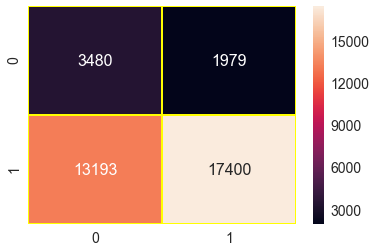

In [365]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_2, annot=True,annot_kws={"size": 16}, fmt='g',linewidth=1,linecolor='yellow')

# summary

- we have roughly 17400 true positives for test data and roughly 3480 true negatives
- Again false negatives are pretty high in number(13k)

# Select best 30 features of both Positive and negative class for both the sets of data

## set1 Bow

In [392]:
X_tr = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, title_bow_train, text_bow_train)).tocsr()
X_te = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, title_bow_test, text_bow_test)).tocsr()
X_cr = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, title_bow_cv, text_bow_cv)).tocsr()

In [443]:
nb_bow = MultinomialNB(alpha = 1,class_prior=[0.5,0.5])

nb_bow.fit(X_tr, y_train)

MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)

In [444]:
# Collecting feature names for BOW set1
# adding to end of list by concatening features
# Code snippet taken from here https://stackabuse.com/append-vs-extend-in-python-lists/

bow_features_names1 = []

In [445]:
for cnt in vectorizer_proj.get_feature_names() :
    bow_features_names1.append(cnt)

for cnt1 in vectorizer_sub_proj.get_feature_names() :
    bow_features_names1.append(cnt1)

for cnt2 in vectorizer_states.get_feature_names() :
    bow_features_names1.append(cnt2)

for cnt3 in vectorizer_grade.get_feature_names() :
    bow_features_names1.append(cnt3)

for cnt4 in vectorizer_teacher.get_feature_names() :
    bow_features_names1.append(cnt4)

In [446]:
len(bow_features_names1)

98

In [447]:

bow_features_names1.append("price")

bow_features_names1.append("quantity")


bow_features_names1.append("prev_proposed_projects")

bow_features_names1.append("title_word_count")

bow_features_names1.append("essay_word_count")

len(bow_features_names1)

103

In [448]:
for cnt5 in vectorizer_bow_title.get_feature_names() :
    bow_features_names1.append(cnt5)

In [449]:
len(bow_features_names1)

2093

In [450]:
for cnt6 in vectorizer_bow_essay.get_feature_names() :
    bow_features_names1.append(cnt6)

In [451]:
len(bow_features_names1)

7093

## Top 30 positive features BOW

## NOTE

- Using argsort by default it sorts in ascending order,but we need sorted log probabilities in desc order.

- While sorting the log probabilities in ascending order  we get least imp features because just for an example say f1 has prob -16 and f2 has prob -14 .The actual prob of f1 would be exp(-16) and actual prob of f2 would be exp(-14). Clearly f2 has higher prob so it is an imp feature

In [452]:
# To use argsort for descending order
# Code snippet taken from https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order

In [453]:
pos_class_prob_sorted = nb_bow.feature_log_prob_[1, :].argsort()[::-1]
for i in pos_class_prob_sorted[:30]:
    print(bow_features_names1[i])

price
essay_word_count
quantity
prev_proposed_projects
students
title_word_count
school
learning
classroom
not
learn
help
grades
many
nannan
need
reading
work
use
love
able
day
come
class
would
technology
also
books
skills
year


# 30 negative features from BOW set1

In [454]:
# To use argsort for descending order
# Code snippet taken from https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order
# using log_prob_ Code taken from https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [455]:
neg_class_prob_sorted = nb_bow.feature_log_prob_[0,:].argsort()[::-1]
for i in neg_class_prob_sorted[0:30]:
    print(bow_features_names1[i])

price
essay_word_count
quantity
prev_proposed_projects
students
title_word_count
school
learning
classroom
not
learn
help
grades
nannan
many
need
work
come
love
reading
materials
able
skills
class
day
use
want
year
make
new


# Summary



- Words like learn is present in negative class but not in positive class

- Few words are similar but their relative ordering is different between the two sets

# tfidf top features

In [456]:
X_tr1 = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_state_categories_one_hot_train, project_grade_categories_one_hot_train, teacher_prefix_categories_one_hot_train, price_train, quantity_train, prev_projects_train, title_word_count_train, essay_word_count_train, text_tfidf_train, title_tfidf_train)).tocsr()
X_te1 = hstack((categories_one_hot_test, sub_categories_one_hot_test, school_state_categories_one_hot_test, project_grade_categories_one_hot_test, teacher_prefix_categories_one_hot_test, price_test, quantity_test, prev_projects_test, title_word_count_test, essay_word_count_test, text_tfidf_test, title_tfidf_test)).tocsr()
X_cr1 = hstack((categories_one_hot_cv, sub_categories_one_hot_cv, school_state_categories_one_hot_cv, project_grade_categories_one_hot_cv, teacher_prefix_categories_one_hot_cv, price_cv, quantity_cv, prev_projects_cv, title_word_count_cv, essay_word_count_cv, text_tfidf_cv, title_tfidf_cv)).tocsr()

In [432]:
X_tr1.shape

(49041, 7093)

In [457]:
nb_tfidf = MultinomialNB(alpha = 0.1,class_prior=[0.5,0.5])

nb_tfidf.fit(X_tr, y_train)

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5], fit_prior=True)

In [458]:
tfidf_features_names = []

In [459]:
for ct1 in vectorizer_proj.get_feature_names() :
    tfidf_features_names.append(ct1)

for ct2 in vectorizer_sub_proj.get_feature_names() :
    tfidf_features_names.append(ct2)

for ct3 in vectorizer_states.get_feature_names() :
    tfidf_features_names.append(ct3)


for ct4 in vectorizer_grade.get_feature_names() :
    tfidf_features_names.append(ct4)


for ct5 in vectorizer_teacher.get_feature_names() :
    tfidf_features_names.append(ct5)

In [460]:
len(tfidf_features_names)

98

In [461]:
tfidf_features_names.append("price")

tfidf_features_names.append("quantity")

tfidf_features_names.append("prev_proposed_projects")

tfidf_features_names.append("title_word_count")

tfidf_features_names.append("essay_word_count")

for ct6 in vectorizer_tfidf_titles.get_feature_names() :
    tfidf_features_names.append(ct6)

for ct7 in vectorizer_tfidf_essay.get_feature_names() :
    tfidf_features_names.append(ct7)

In [462]:
len(tfidf_features_names)

7093

# positive features of tfidf

In [463]:
pos_class_prob_sorted_tfidf = nb_tfidf.feature_log_prob_[1, :].argsort()[::-1][:7210]
for i in pos_class_prob_sorted_tfidf[0:30]:
    print(tfidf_features_names[i])

price
essay_word_count
quantity
prev_proposed_projects
students
title_word_count
school
learning
classroom
not
learn
help
grades
many
nannan
need
reading
work
use
love
able
day
come
class
would
technology
also
books
skills
year


# Negative features from Tfidf

In [464]:
neg_class_prob_sorted_tfidf = nb_tfidf.feature_log_prob_[0, :].argsort()[::-1][:7210]
for i in neg_class_prob_sorted_tfidf[0:30]:
    print(tfidf_features_names[i])

price
essay_word_count
quantity
prev_proposed_projects
students
title_word_count
school
learning
classroom
not
learn
help
grades
nannan
many
need
work
come
love
reading
materials
able
skills
class
day
use
want
year
make
new


# summary

- Again important features appear similar at first glance but actually there are some differences compared to set1
- relative ordering is different between the two sets







# conclusions

In [465]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Alpha:Hyper Parameter", " Test AUC"]

x.add_row(["BOW", "Naive Bayes", 1, 0.634380])
x.add_row(["TFIDF", "Naive Bayes", 0.1, 0.634361])

print(x)

+------------+-------------+-----------------------+-----------+
| Vectorizer |    Model    | Alpha:Hyper Parameter |  Test AUC |
+------------+-------------+-----------------------+-----------+
|    BOW     | Naive Bayes |           1           |  0.63438  |
|   TFIDF    | Naive Bayes |          0.1          |  0.634361 |
+------------+-------------+-----------------------+-----------+


- We conclude that Naive bayes gives better AUC than KNN

- also it is very fast as compared to KNN.

- naive Bayes is super interpretable because of probability values, we can get feature importance very easily as seen above

- There is strong possibility that Naive bayes can overfit if alpha has not been found properly